In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
###Load the data as dataframe

df = pd.read_csv('cosp_files_c1_training_data.csv', encoding = 'utf-8')

df.columns
#print(df.isnull().sum())


Index(['file_name', 'language', 'label', 'text'], dtype='object')

In [3]:
df.head()

,file_name,language,label,text
0,13.cha,Bosnian,1,this is a story about tom elephant and mary gi...
1,07.cha,Bosnian,1,once upon time there was a giraffe mary and to...
2,06.cha,Bosnian,1,while tom elephant and mary giraffe were walki...
3,12.cha,Bosnian,1,one day the marry giraffe and to elephant they...
4,10.cha,Bosnian,1,one day tom and mary go for a walk. they walk ...


In [4]:
sentences = df.text.values
labels = df.label.values

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Convert text documents into n-grams representations

#CountVectorizer creates a matrix where each row represents a file and each column represents an n-gram. 
#The feature matrix is used to train a classifier.
vectorizer = CountVectorizer(ngram_range=(2,2))  # Adjust n-gram range as needed. (2,2) is for bigrams
#vectorizer = CountVectorizer(analyzer='char',ngram_range=(1,4))  # Adjust character n-gram range as needed
X = vectorizer.fit_transform(sentences)
y = labels






In [5]:
# Convert the sparse matrix to a dense matrix and then to a DataFrame
feature_names = vectorizer.get_feature_names_out()
#print(feature_names)
feature_matrix_df = pd.DataFrame(X.toarray(), columns=feature_names)
feature_matrix_df['label'] = y

# Print the DataFrame or send to an csv file

#print(feature_matrix_df)
output_file = "td_bigram_feature_matrix_1.csv"
feature_matrix_df.to_csv(output_file, index=False)
print(feature_matrix_df)
print(f"Feature matrix saved to {output_file}")

    a_k_seven mary  about being  about friendship  about giraffe  about that  \
0                0            0                 0              0           0   
1                0            0                 0              0           0   
2                0            0                 0              0           0   
3                0            0                 0              0           0   
4                0            0                 0              0           0   
5                0            0                 0              0           0   
6                0            0                 0              0           0   
7                0            0                 1              0           0   
8                0            0                 0              0           0   
9                0            0                 0              0           1   
10               0            0                 0              0           0   
11               0            0         

### Accuracy & Confusion Matrix: linear, c=1.0

In [7]:
per_label_means = feature_matrix_df.groupby('label').mean().T

# Show top features for each label
for label in per_label_means.columns:
    print(f"\nTop features for label {label}:")
    print(per_label_means[label].sort_values(ascending=False).head(50))


Top features for label 0:
the ball         3.000000
tom elephant     1.941176
and tom          1.764706
to the           1.588235
mary giraffe     1.352941
giraffe and      0.941176
the swimming     0.882353
swimming pool    0.823529
playing with     0.823529
to mary          0.764706
ball and         0.764706
and mary         0.705882
pool and         0.647059
they are         0.588235
in the           0.588235
the end          0.588235
with the         0.529412
the pool         0.529412
with ball        0.529412
and they         0.529412
go to            0.529412
mary and         0.470588
the elephant     0.470588
in love          0.411765
ball to          0.411765
of tom           0.352941
tom and          0.352941
catch the        0.352941
one day          0.352941
ball then        0.352941
the water        0.352941
and he           0.352941
and the          0.352941
with tom         0.352941
elephant are     0.294118
are playing      0.294118
next to          0.294118
take the   

In [8]:
### Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the SVM classifier
ln_svm_classifier_1_0 = SVC(kernel='linear',C=1.0,class_weight='balanced')  
ln_svm_classifier_1_0.fit(X_train, y_train)

### Test - make predictions on the validation set
ln_y_pred_1_0 = ln_svm_classifier_1_0.predict(X_test)


In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Evaluate the performance
ln_accuracy_1_0 = accuracy_score(y_test, ln_y_pred_1_0)
print(f"Accuracy: {ln_accuracy_1_0}")

ln_conf_matrix_1_0 = confusion_matrix(y_test, ln_y_pred_1_0)
ln_classification_rep_1_0 = classification_report(y_test, ln_y_pred_1_0)

# Print the evaluation metrics
print(f'Confusion Matrix:\n{ln_conf_matrix_1_0}')
print(f'Classification Report:\n{ln_classification_rep_1_0}')

Accuracy: 0.5454545454545454
Confusion Matrix:
[[0 1 2]
 [0 2 2]
 [0 0 4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.67      0.50      0.57         4
           2       0.50      1.00      0.67         4

    accuracy                           0.55        11
   macro avg       0.39      0.50      0.41        11
weighted avg       0.42      0.55      0.45        11



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Accuracy & Confusion Matrix: linear, c=0.1

In [11]:
#Random Forest classifier run
from sklearn.ensemble import RandomForestClassifier

# Random Forest
ln_svm_classifier_1_0 = RandomForestClassifier(random_state=42)
ln_svm_classifier_1_0.fit(X_test, y_test)

# Feature importance
feature_importance = pd.DataFrame(ln_svm_classifier_1_0.feature_importances_, index=vectorizer.get_feature_names_out(), columns=['Importance'])
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance.head(10))  # Top 10 important features

              Importance
the pool        0.028122
the ball        0.026838
he is           0.026060
fall in         0.019805
mary and        0.016018
mary giraffe    0.012943
in the          0.012620
happily ever    0.012574
are go          0.012203
to the          0.011032


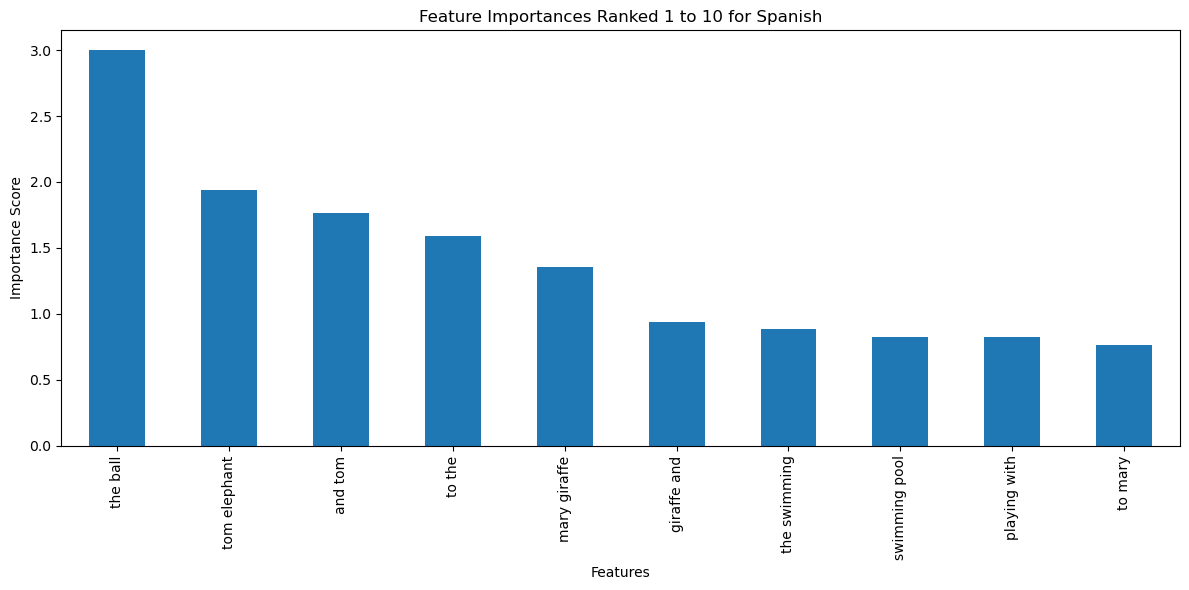

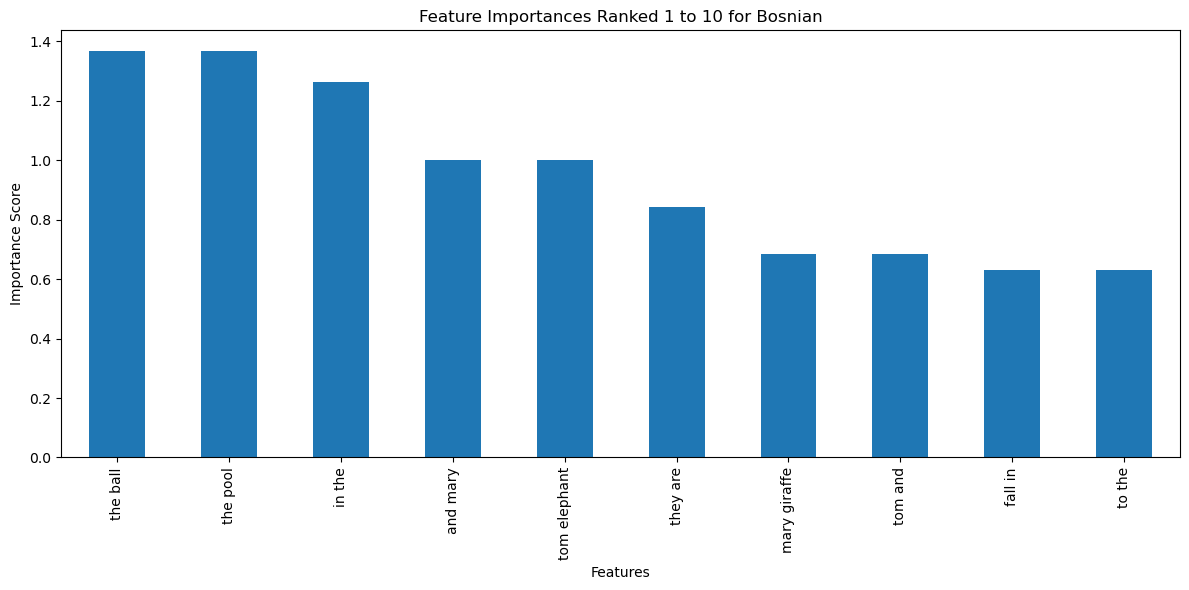

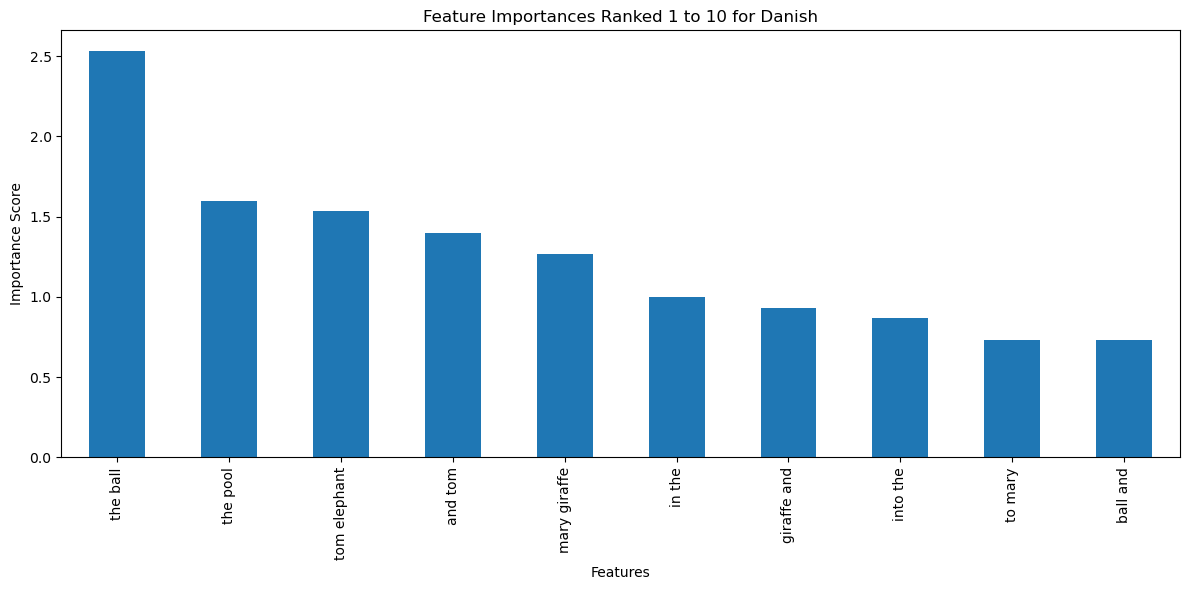

In [12]:
import matplotlib.pyplot as plt

# Define custom ranges for each label
custom_ranges = {
    0: (0, 10),
    1: (0, 10),
    2: (0,10)
}

# Map numeric labels to language names
label_names = {
    0: 'Spanish',
    1: 'Bosnian',
    2: 'Danish'
}

# Plot feature importance per label with its own range
for label, (start, end) in custom_ranges.items():
    # Sort feature importances for the label
    sorted_features = per_label_means[label].sort_values(ascending=False)

    # Plot selected range
    plt.figure(figsize=(12, 6))
    sorted_features.iloc[start:end].plot(kind='bar')
    plt.title(f'Feature Importances Ranked {start+1} to {end} for {label_names[label]}')
    plt.ylabel('Importance Score')
    plt.xlabel('Features')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [13]:
### Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the SVM classifier
ln_svm_classifier_0_1 = SVC(kernel='linear',C=0.1,class_weight='balanced')  
ln_svm_classifier_0_1.fit(X_train, y_train)

### Test - make predictions on the validation set
ln_y_pred_0_1 = ln_svm_classifier_0_1.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Evaluate the performance
ln_accuracy_0_1 = accuracy_score(y_test, ln_y_pred_0_1)
print(f"Accuracy: {ln_accuracy_0_1}")

ln_conf_matrix_0_1 = confusion_matrix(y_test, ln_y_pred_0_1)
ln_classification_rep_0_1 = classification_report(y_test, ln_y_pred_0_1)

# Print the evaluation metrics
print(f'Confusion Matrix:\n{ln_conf_matrix_0_1}')
print(f'Classification Report:\n{ln_classification_rep_0_1}')

Accuracy: 0.5454545454545454
Confusion Matrix:
[[0 1 2]
 [0 2 2]
 [0 0 4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.67      0.50      0.57         4
           2       0.50      1.00      0.67         4

    accuracy                           0.55        11
   macro avg       0.39      0.50      0.41        11
weighted avg       0.42      0.55      0.45        11



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Accuracy & Confusion Matrix: rbf, c=1.0

In [16]:
### Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the SVM classifier
rbf_svm_classifier_1_0 = SVC(kernel='rbf',C=1.0,class_weight='balanced')  
rbf_svm_classifier_1_0.fit(X_train, y_train)

### Test - make predictions on the validation set
rbf_y_pred_1_0 = rbf_svm_classifier_1_0.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Evaluate the performance
rbf_accuracy_1_0 = accuracy_score(y_test, rbf_y_pred_1_0)
print(f"Accuracy: {rbf_accuracy_1_0}")

rbf_conf_matrix_1_0 = confusion_matrix(y_test, rbf_y_pred_1_0)
rbf_classification_rep_1_0 = classification_report(y_test, rbf_y_pred_1_0)

# Print the evaluation metrics
print(f'Confusion Matrix:\n{rbf_conf_matrix_1_0}')
print(f'Classification Report:\n{rbf_classification_rep_1_0}')

Accuracy: 0.5454545454545454
Confusion Matrix:
[[1 1 1]
 [0 3 1]
 [0 2 2]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.50      0.75      0.60         4
           2       0.50      0.50      0.50         4

    accuracy                           0.55        11
   macro avg       0.67      0.53      0.53        11
weighted avg       0.64      0.55      0.54        11



### Accuracy & Confusion Matrix: rbf, c=0.1

In [19]:
### Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the SVM classifier
rbf_svm_classifier_0_1 = SVC(kernel='rbf',C=0.1,class_weight='balanced')  
rbf_svm_classifier_0_1.fit(X_train, y_train)

### Test - make predictions on the validation set
rbf_y_pred_0_1 = rbf_svm_classifier_0_1.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Evaluate the performance
rbf_accuracy_0_1 = accuracy_score(y_test, rbf_y_pred_0_1)
print(f"Accuracy: {rbf_accuracy_0_1}")

rbf_conf_matrix_0_1 = confusion_matrix(y_test, rbf_y_pred_0_1)
rbf_classification_rep_0_1 = classification_report(y_test, rbf_y_pred_0_1)

# Print the evaluation metrics
print(f'Confusion Matrix:\n{rbf_conf_matrix_0_1}')
print(f'Classification Report:\n{rbf_classification_rep_0_1}')

Accuracy: 0.36363636363636365
Confusion Matrix:
[[0 3 0]
 [0 4 0]
 [0 4 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.36      1.00      0.53         4
           2       0.00      0.00      0.00         4

    accuracy                           0.36        11
   macro avg       0.12      0.33      0.18        11
weighted avg       0.13      0.36      0.19        11



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Cross Validation

### linear, c=1.0, k=5

In [23]:
#Cross_Validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, LeaveOneOut


ln_model_5_1_0 = SVC(kernel='linear',C=1.0,class_weight='balanced') 

# Define the number of folds for cross-validation
ln_kfold_5_1_0 = KFold(n_splits=5, shuffle=True, random_state=42)
# Project: LeaveOneOut cross-validation instead of kfold
# loo = LeaveOneOut()

# Perform cross-validation
ln_scores_5_1_0 = cross_val_score(ln_model_5_1_0, X, y, cv=ln_kfold_5_1_0)
# scores = cross_val_score(model, X, y, cv=loo)

# Print the cross-validation scores
print("Cross-validation scores:", ln_scores_5_1_0)
print("Mean CV accuracy:", np.mean(ln_scores_5_1_0))

Cross-validation scores: [0.54545455 0.5        0.9        0.7        0.5       ]
Mean CV accuracy: 0.6290909090909091


### linear, c=0.1, k=5

In [25]:
#Cross_Validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, LeaveOneOut


ln_model_5_0_1 = SVC(kernel='linear',C=0.1,class_weight='balanced') 

# Define the number of folds for cross-validation
ln_kfold_5_0_1 = KFold(n_splits=5, shuffle=True, random_state=42)
# Project: LeaveOneOut cross-validation instead of kfold
# loo = LeaveOneOut()

# Perform cross-validation
ln_scores_5_0_1 = cross_val_score(ln_model_5_0_1, X, y, cv=ln_kfold_5_0_1)
# scores = cross_val_score(model, X, y, cv=loo)

# Print the cross-validation scores
print("Cross-validation scores:", ln_scores_5_0_1)
print("Mean CV accuracy:", np.mean(ln_scores_5_0_1))

Cross-validation scores: [0.54545455 0.5        0.9        0.7        0.5       ]
Mean CV accuracy: 0.6290909090909091


### LeaveOneOut

In [26]:
#Cross_Validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, LeaveOneOut


ln_model_5_1_0 = SVC(kernel='linear',C=1.0,class_weight='balanced') 

# Define the number of folds for cross-validation
#ln_kfold_5_1_0 = KFold(n_splits=5, shuffle=True, random_state=42)
# Project: LeaveOneOut cross-validation instead of kfold
loo = LeaveOneOut()

# Perform cross-validation
ln_scores_5_1_0 = cross_val_score(ln_model_5_1_0, X, y, cv=loo)
# scores = cross_val_score(model, X, y, cv=loo)

# Print the cross-validation scores
print("Cross-validation scores:", ln_scores_5_1_0)
print("Mean CV accuracy:", np.mean(ln_scores_5_1_0))

Cross-validation scores: [1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1.]
Mean CV accuracy: 0.6470588235294118


### linear, c=1.0, k=6

In [28]:
#Cross_Validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, LeaveOneOut


ln_model_6_1_0 = SVC(kernel='linear',C=1.0,class_weight='balanced') 

# Define the number of folds for cross-validation
ln_kfold_6_1_0 = KFold(n_splits=6, shuffle=True, random_state=42)
# Project: LeaveOneOut cross-validation instead of kfold
# loo = LeaveOneOut()

# Perform cross-validation
ln_scores_6_1_0 = cross_val_score(ln_model_6_1_0, X, y, cv=ln_kfold_6_1_0)
# scores = cross_val_score(model, X, y, cv=loo)

# Print the cross-validation scores
print("Cross-validation scores:", ln_scores_6_1_0)
print("Mean CV accuracy:", np.mean(ln_scores_6_1_0))

Cross-validation scores: [0.66666667 0.66666667 0.77777778 0.625      0.5        0.75      ]
Mean CV accuracy: 0.6643518518518519


### linear, c=0.1, k=6

In [30]:
#Cross_Validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, LeaveOneOut


ln_model_6_0_1 = SVC(kernel='linear',C=0.1,class_weight='balanced') 

# Define the number of folds for cross-validation
ln_kfold_6_0_1 = KFold(n_splits=6, shuffle=True, random_state=42)
# Project: LeaveOneOut cross-validation instead of kfold
# loo = LeaveOneOut()

# Perform cross-validation
ln_scores_6_0_1 = cross_val_score(ln_model_6_0_1, X, y, cv=ln_kfold_6_0_1)
# scores = cross_val_score(model, X, y, cv=loo)

# Print the cross-validation scores
print("Cross-validation scores:", ln_scores_6_0_1)
print("Mean CV accuracy:", np.mean(ln_scores_6_0_1))

Cross-validation scores: [0.66666667 0.66666667 0.77777778 0.625      0.5        0.75      ]
Mean CV accuracy: 0.6643518518518519


### linear, c=1.0, k=7

In [32]:
#Cross_Validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, LeaveOneOut


ln_model_7_1_0 = SVC(kernel='linear',C=1.0,class_weight='balanced') 

# Define the number of folds for cross-validation
ln_kfold_7_1_0 = KFold(n_splits=7, shuffle=True, random_state=42)
# Project: LeaveOneOut cross-validation instead of kfold
# loo = LeaveOneOut()

# Perform cross-validation
ln_scores_7_1_0 = cross_val_score(ln_model_7_1_0, X, y, cv=ln_kfold_7_1_0)
# scores = cross_val_score(model, X, y, cv=loo)

# Print the cross-validation scores
print("Cross-validation scores:", ln_scores_7_1_0)
print("Mean CV accuracy:", np.mean(ln_scores_7_1_0))

Cross-validation scores: [0.625      0.75       0.71428571 0.85714286 0.42857143 0.42857143
 0.85714286]
Mean CV accuracy: 0.6658163265306122


### Linear, c=0.1, k=7

In [34]:
#Cross_Validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, LeaveOneOut


ln_model_7_0_1 = SVC(kernel='linear',C=0.1,class_weight='balanced') 

# Define the number of folds for cross-validation
ln_kfold_7_0_1 = KFold(n_splits=7, shuffle=True, random_state=42)
# Project: LeaveOneOut cross-validation instead of kfold
# loo = LeaveOneOut()

# Perform cross-validation
ln_scores_7_0_1 = cross_val_score(ln_model_7_0_1, X, y, cv=ln_kfold_7_0_1)
# scores = cross_val_score(model, X, y, cv=loo)

# Print the cross-validation scores
print("Cross-validation scores:", ln_scores_7_0_1)
print("Mean CV accuracy:", np.mean(ln_scores_7_0_1))

Cross-validation scores: [0.625      0.75       0.71428571 0.85714286 0.42857143 0.42857143
 0.85714286]
Mean CV accuracy: 0.6658163265306122


### Linear, c=1.0, k=8

In [36]:
#Cross_Validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, LeaveOneOut


ln_model_8_1_0 = SVC(kernel='linear',C=1.0,class_weight='balanced') 

# Define the number of folds for cross-validation
ln_kfold_8_1_0 = KFold(n_splits=8, shuffle=True, random_state=42)
# Project: LeaveOneOut cross-validation instead of kfold
# loo = LeaveOneOut()

# Perform cross-validation
ln_scores_8_1_0 = cross_val_score(ln_model_8_1_0, X, y, cv=ln_kfold_8_1_0)
# scores = cross_val_score(model, X, y, cv=loo)

# Print the cross-validation scores
print("Cross-validation scores:", ln_scores_8_1_0)
print("Mean CV accuracy:", np.mean(ln_scores_8_1_0))

Cross-validation scores: [0.57142857 0.85714286 0.71428571 1.         0.66666667 0.5
 0.33333333 0.83333333]
Mean CV accuracy: 0.6845238095238095


### Linear, c=0.1, k=8

In [38]:
#Cross_Validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, LeaveOneOut


ln_model_8_0_1 = SVC(kernel='linear',C=0.1,class_weight='balanced') 

# Define the number of folds for cross-validation
ln_kfold_8_0_1 = KFold(n_splits=8, shuffle=True, random_state=42)
# Project: LeaveOneOut cross-validation instead of kfold
# loo = LeaveOneOut()

# Perform cross-validation
ln_scores_8_0_1 = cross_val_score(ln_model_8_0_1, X, y, cv=ln_kfold_8_0_1)
# scores = cross_val_score(model, X, y, cv=loo)

# Print the cross-validation scores
print("Cross-validation scores:", ln_scores_8_0_1)
print("Mean CV accuracy:", np.mean(ln_scores_8_0_1))

Cross-validation scores: [0.57142857 0.85714286 0.71428571 1.         0.66666667 0.5
 0.33333333 0.83333333]
Mean CV accuracy: 0.6845238095238095


### Linear, c=1.0, k=9

In [40]:
#Cross_Validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, LeaveOneOut


ln_model_9_1_0 = SVC(kernel='linear',C=1.0,class_weight='balanced') 

# Define the number of folds for cross-validation
ln_kfold_9_1_0 = KFold(n_splits=9, shuffle=True, random_state=42)
# Project: LeaveOneOut cross-validation instead of kfold
# loo = LeaveOneOut()

# Perform cross-validation
ln_scores_9_1_0 = cross_val_score(ln_model_9_1_0, X, y, cv=ln_kfold_9_1_0)
# scores = cross_val_score(model, X, y, cv=loo)

# Print the cross-validation scores
print("Cross-validation scores:", ln_scores_9_1_0)
print("Mean CV accuracy:", np.mean(ln_scores_9_1_0))

Cross-validation scores: [0.5        0.5        0.66666667 0.66666667 0.83333333 0.5
 0.6        0.2        0.8       ]
Mean CV accuracy: 0.5851851851851851


### Linear, c=0.1, k=9

In [42]:
#Cross_Validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, LeaveOneOut


ln_model_9_0_1 = SVC(kernel='linear',C=0.1,class_weight='balanced') 

# Define the number of folds for cross-validation
ln_kfold_9_0_1 = KFold(n_splits=9, shuffle=True, random_state=42)
# Project: LeaveOneOut cross-validation instead of kfold
# loo = LeaveOneOut()

# Perform cross-validation
ln_scores_9_0_1 = cross_val_score(ln_model_9_0_1, X, y, cv=ln_kfold_9_0_1)
# scores = cross_val_score(model, X, y, cv=loo)

# Print the cross-validation scores
print("Cross-validation scores:", ln_scores_9_0_1)
print("Mean CV accuracy:", np.mean(ln_scores_9_0_1))

Cross-validation scores: [0.5        0.5        0.66666667 0.66666667 0.83333333 0.5
 0.6        0.2        0.8       ]
Mean CV accuracy: 0.5851851851851851


### Linear, c=1.0, k=10

In [44]:
#Cross_Validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, LeaveOneOut


ln_model_10_1_0 = SVC(kernel='linear',C=1.0,class_weight='balanced') 

# Define the number of folds for cross-validation
ln_kfold_10_1_0 = KFold(n_splits=10, shuffle=True, random_state=42)
# Project: LeaveOneOut cross-validation instead of kfold
# loo = LeaveOneOut()

# Perform cross-validation
ln_scores_10_1_0 = cross_val_score(ln_model_10_1_0, X, y, cv=ln_kfold_10_1_0)
# scores = cross_val_score(model, X, y, cv=loo)

# Print the cross-validation scores
print("Cross-validation scores:", ln_scores_10_1_0)
print("Mean CV accuracy:", np.mean(ln_scores_10_1_0))

Cross-validation scores: [0.5 0.6 0.6 0.6 1.  0.8 0.6 0.6 0.2 0.8]
Mean CV accuracy: 0.63


### Linear, c=0.1, k=10

In [46]:
#Cross_Validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, LeaveOneOut


ln_model_10_0_1 = SVC(kernel='linear',C=0.1,class_weight='balanced') 

# Define the number of folds for cross-validation
ln_kfold_10_0_1 = KFold(n_splits=10, shuffle=True, random_state=42)
# Project: LeaveOneOut cross-validation instead of kfold
# loo = LeaveOneOut()

# Perform cross-validation
ln_scores_10_0_1 = cross_val_score(ln_model_10_0_1, X, y, cv=ln_kfold_10_0_1)
# scores = cross_val_score(model, X, y, cv=loo)

# Print the cross-validation scores
print("Cross-validation scores:", ln_scores_10_0_1)
print("Mean CV accuracy:", np.mean(ln_scores_10_0_1))

Cross-validation scores: [0.5 0.6 0.6 0.6 1.  0.8 0.6 0.6 0.2 0.8]
Mean CV accuracy: 0.63


### rbf, c=1.0, k=5

In [48]:
#Cross_Validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, LeaveOneOut


rbf_model_5_1_0 = SVC(kernel='rbf',C=1.0,class_weight='balanced') 

# Define the number of folds for cross-validation
rbf_kfold_5_1_0 = KFold(n_splits=5, shuffle=True, random_state=42)
#loo = LeaveOneOut()

# Perform cross-validation
rbf_scores_5_1_0 = cross_val_score(rbf_model_5_1_0, X, y, cv=rbf_kfold_5_1_0)
#scores = cross_val_score(model, X, y, cv=loo)

# Print the cross-validation scores
print("Cross-validation scores:", rbf_scores_5_1_0)
print("Mean CV accuracy:", np.mean(rbf_scores_5_1_0))

Cross-validation scores: [0.54545455 0.8        0.6        0.6        0.5       ]
Mean CV accuracy: 0.6090909090909091


### rbf, c=0.1, k=5

In [50]:
#Cross_Validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, LeaveOneOut


rbf_model_5_0_1 = SVC(kernel='rbf',C=0.1,class_weight='balanced') 

# Define the number of folds for cross-validation
rbf_kfold_5_0_1 = KFold(n_splits=5, shuffle=True, random_state=42)
#loo = LeaveOneOut()

# Perform cross-validation
rbf_scores_5_0_1 = cross_val_score(rbf_model_5_0_1, X, y, cv=rbf_kfold_5_0_1)
#scores = cross_val_score(model, X, y, cv=loo)

# Print the cross-validation scores
print("Cross-validation scores:", rbf_scores_5_0_1)
print("Mean CV accuracy:", np.mean(rbf_scores_5_0_1))

Cross-validation scores: [0.36363636 0.4        0.4        0.4        0.4       ]
Mean CV accuracy: 0.3927272727272727


### rbf, c=1.0, k=6

In [52]:
#Cross_Validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, LeaveOneOut


rbf_model_6_1_0 = SVC(kernel='rbf',C=1.0,class_weight='balanced') 

# Define the number of folds for cross-validation
rbf_kfold_6_1_0 = KFold(n_splits=6, shuffle=True, random_state=42)
#loo = LeaveOneOut()

# Perform cross-validation
rbf_scores_6_1_0 = cross_val_score(rbf_model_6_1_0, X, y, cv=rbf_kfold_6_1_0)
#scores = cross_val_score(model, X, y, cv=loo)

# Print the cross-validation scores
print("Cross-validation scores:", rbf_scores_6_1_0)
print("Mean CV accuracy:", np.mean(rbf_scores_6_1_0))

Cross-validation scores: [0.55555556 0.88888889 0.77777778 0.625      0.375      0.625     ]
Mean CV accuracy: 0.6412037037037037


### rbf, c=0.1, k=6

In [54]:
#Cross_Validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, LeaveOneOut


rbf_model_6_0_1 = SVC(kernel='rbf',C=0.1,class_weight='balanced') 

# Define the number of folds for cross-validation
rbf_kfold_6_0_1 = KFold(n_splits=6, shuffle=True, random_state=42)
#loo = LeaveOneOut()

# Perform cross-validation
rbf_scores_6_0_1 = cross_val_score(rbf_model_6_0_1, X, y, cv=rbf_kfold_6_0_1)
#scores = cross_val_score(model, X, y, cv=loo)

# Print the cross-validation scores
print("Cross-validation scores:", rbf_scores_6_0_1)
print("Mean CV accuracy:", np.mean(rbf_scores_6_0_1))

Cross-validation scores: [0.33333333 0.44444444 0.33333333 0.375      0.25       0.375     ]
Mean CV accuracy: 0.3518518518518518
